In [36]:
import json

import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from dj_config.settings import BASE_DIR

In [37]:
"""Verify the installation"""

print(f"tf = {tf.__version__}")
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices("GPU"))

tf = 2.15.0
tf.Tensor(-512.0589, shape=(), dtype=float32)
[]


In [38]:
"""Define functions to graph the full set of 10 class predictions."""


def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label, 100 * np.max(predictions_array), true_label
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

In [39]:
labels = [0] * 81
np.array(labels).shape

(81,)

In [40]:
"""load x_test_combo data"""

saved_x_test = "x_test_2024_02_09_10_18"
x_test_path = f"{BASE_DIR}/data_sources/ml_data/{saved_x_test}.json"

with open(x_test_path, "r") as report_file:
    x_test_data = json.load(report_file)

x_test = np.array(x_test_data)
x_test.shape

(20917, 28, 28)

In [41]:
"""Loading the model """

saved_model = "trained_mnist_2024_02_09_10_18"
model_save_path = f"{BASE_DIR}/data_sources/ml_data/{saved_model}.keras"

model = keras.models.load_model(model_save_path)

In [42]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

654/654 [==============================] - 0s 569us/step


In [43]:
"""Load board data"""

difficulty = "easy"
board_number = 194
board_name = f"{difficulty}_{board_number}"

board_data_path = f"{BASE_DIR}/data_sources/board_data/{difficulty}/{board_name}.json"

with open(board_data_path, "r") as report_file:
    _board_data = json.load(report_file)

board_data = np.array(_board_data)
board_data.shape

(81, 28, 28)

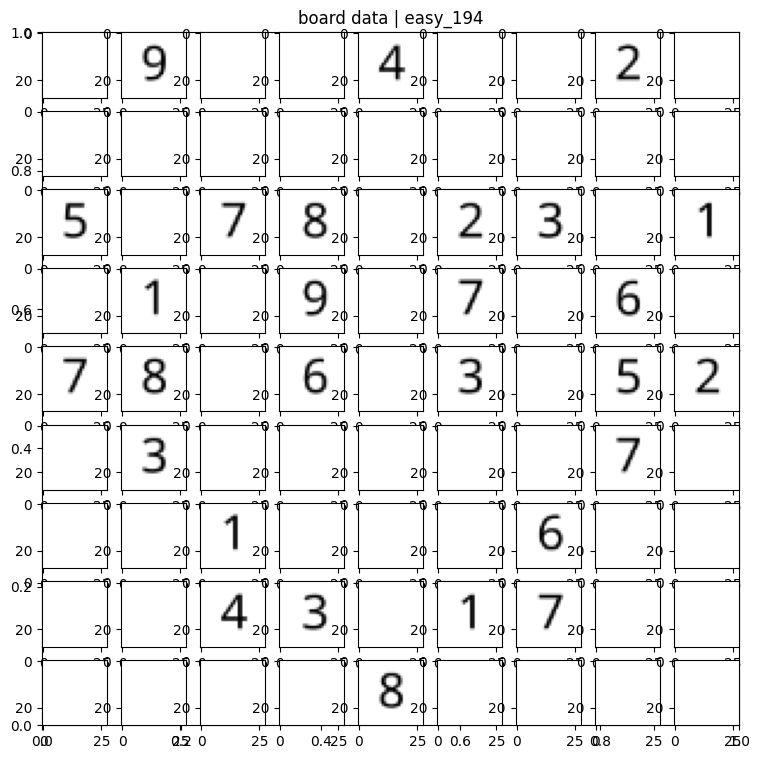

In [44]:
plt.figure(figsize=(9, 9))
plt.title(f"board data | {board_name}")
for count, number_data in enumerate(board_data):
    plt.subplot(9, 9, count + 1)
    plt.imshow(number_data, cmap=plt.cm.binary)
plt.show()

1/1 [==============================] - 0s 10ms/step


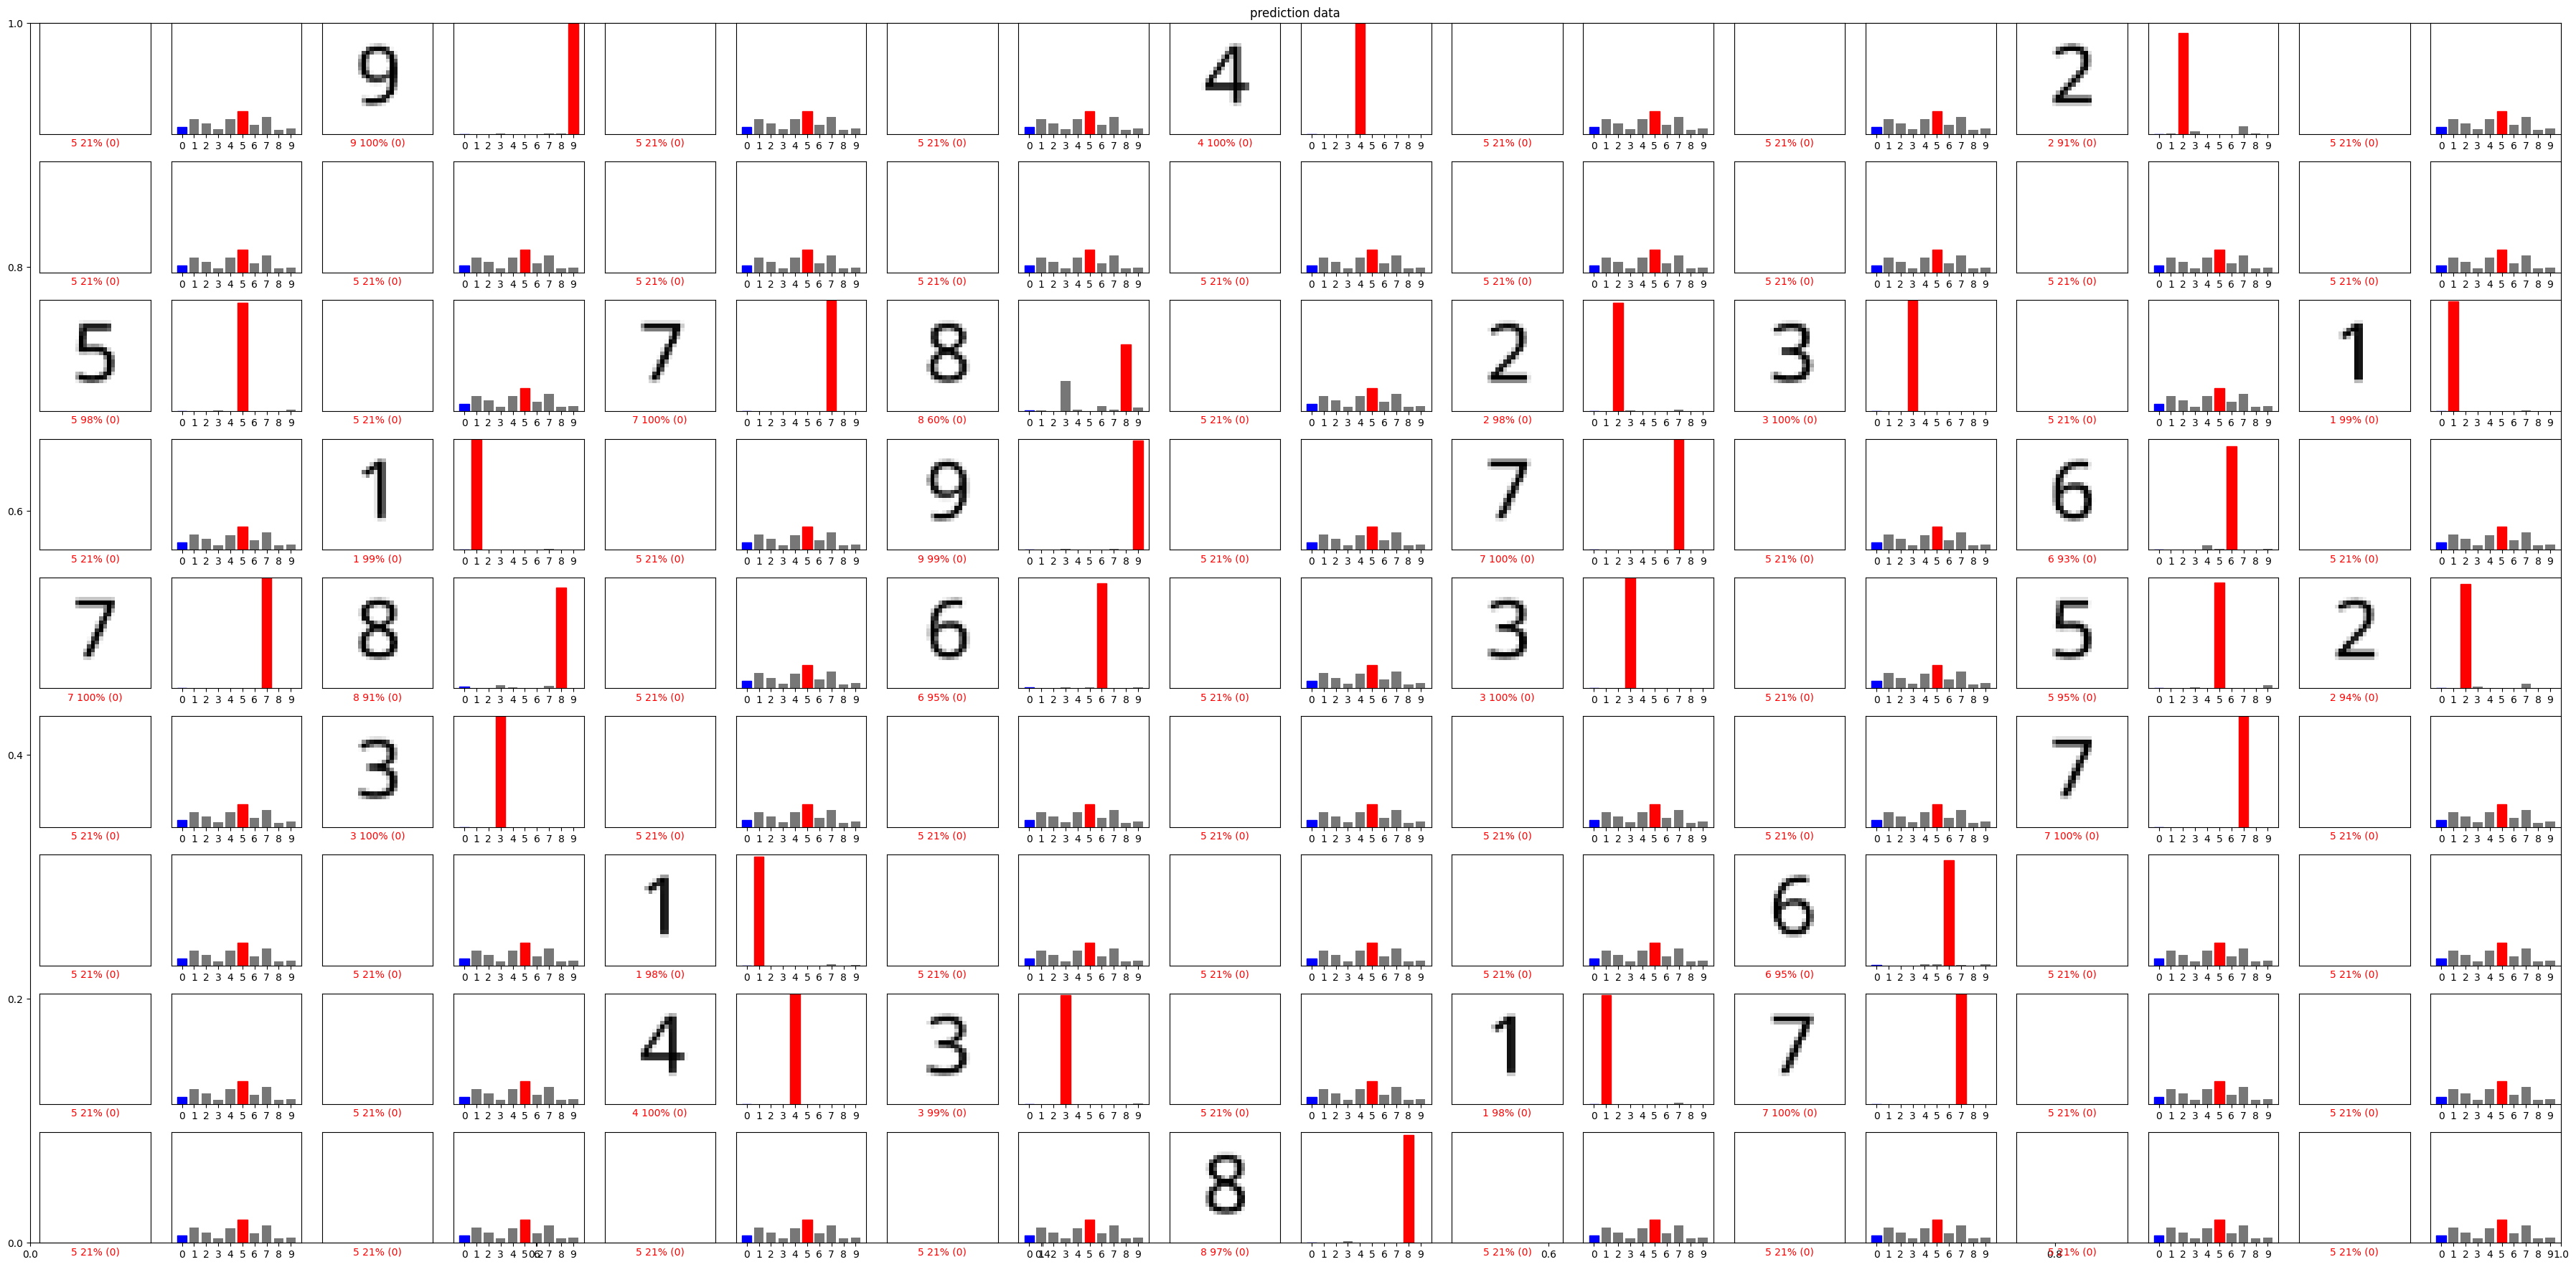

board_name = 'easy_194'


In [45]:
prediction_numbers = []

num_rows = 9
num_cols = 9
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
plt.title("prediction data")
for i in range(num_images):

    img_to_predict = np.expand_dims(board_data[i], axis=0)
    predictions_single = probability_model.predict(img_to_predict)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_single[0], labels, board_data)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_single[0], labels)

    if np.count_nonzero(board_data[i]) == 0:
        prediction_numbers.append(0)
    else:
        prediction_number = np.argmax(predictions_single[0])
        prediction_numbers.append(prediction_number)

plt.tight_layout()
plt.show()

print(f"{board_name = }")

In [46]:
_tf_numbers = np.array(prediction_numbers)
tf_numbers = _tf_numbers.reshape((9, 9))
tf_numbers

array([[0, 9, 0, 0, 4, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [5, 0, 7, 8, 0, 2, 3, 0, 1],
       [0, 1, 0, 9, 0, 7, 0, 6, 0],
       [7, 8, 0, 6, 0, 3, 0, 5, 2],
       [0, 3, 0, 0, 0, 0, 0, 7, 0],
       [0, 0, 1, 0, 0, 0, 6, 0, 0],
       [0, 0, 4, 3, 0, 1, 7, 0, 0],
       [0, 0, 0, 0, 8, 0, 0, 0, 0]])